In [48]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
data_path = os.path.abspath(r'../data/DAC_tests/')
dac_data_paths = {
    dac_num: glob.glob(os.path.join(data_path, f'dac{dac_num}_*'))
    for dac_num in range(1,5)
}

In [40]:
dac_data_paths

{1: ['/home/princeps/Documents/Capstone/microp/VnV/data/DAC_tests/dac1_1_raw.csv'],
 2: ['/home/princeps/Documents/Capstone/microp/VnV/data/DAC_tests/dac2_1_raw.csv'],
 3: ['/home/princeps/Documents/Capstone/microp/VnV/data/DAC_tests/dac3_1_raw.csv'],
 4: ['/home/princeps/Documents/Capstone/microp/VnV/data/DAC_tests/dac4_1_raw.csv']}

In [148]:
dac_data_pd = {
    dac_num: pd.concat([
        pd.read_csv(file_path, skiprows=8) for file_path in data_files
    ])
    for dac_num, data_files in dac_data_paths.items()
}
# add diff information
for df in dac_data_pd.values():
    df['reading_diff'] = df['Reading'].diff()
    df['discontinuity'] =df['reading_diff'].abs() > 0.01
    count = 0
    for i, row in df['discontinuity'].iteritems():
        if not row:
            df.loc[i, 'discontinuity'] = count
        else:
            count += 1
            df.loc[i, 'discontinuity']  = count
    df.drop(df[df['discontinuity'] <= 1].index, inplace=True)
#     df.groupby('discontinuity').Reading.mean()

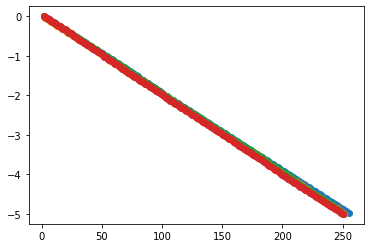

In [157]:
# fig = plt.figure()
fig = []

color_count = 0
for frame in dac_data_pd.values():
    fig.append(plt.scatter(frame.groupby('discontinuity').Reading.mean().index, frame.groupby('discontinuity').Reading.mean()))
    color_count +=1

# plt.xlim(1,50)
fig[3]

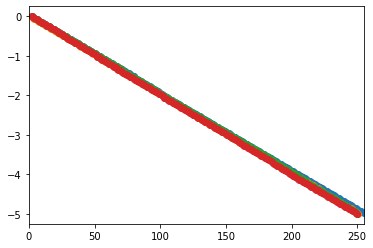

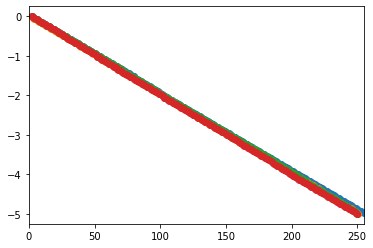

In [158]:
fig = plt.figure()

count = 0
for frame in dac_data_pd.values():
    (plt.scatter(frame.groupby('discontinuity').Reading.mean().index, frame.groupby('discontinuity').Reading.mean()))

plt.xlim(0,255)
# plt.ylim(-1,0)
fig